In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
# The following tables were generated in R using ANCOMBC2 package (2018-050_ancomb.r script)
res_prim_BSPSPC = pd.read_csv( "./results/2020-023_res_prim_BSPSPC.csv", index_col=0)
res_prim_PSC = pd.read_csv( "./results/2020-023_res_prim_PSC.csv", index_col=0)
res_prim_stool = pd.read_csv( "./results/2020-023_res_prim_stool.csv", index_col=0)
res_prim_seren = pd.read_csv( "./results/2020-023_res_prim_seren.csv", index_col=0)

In [6]:
res_prim_BSPSPC

,taxon,lfc_(Intercept),lfc_Materialstool,se_(Intercept),se_Materialstool,W_(Intercept),W_Materialstool,p_(Intercept),p_Materialstool,q_(Intercept),q_Materialstool,diff_(Intercept),diff_Materialstool,passed_ss_(Intercept),passed_ss_Materialstool
1,C__Alphaproteobacteria,0.622244,-1.135336,0.084667,0.240215,7.349298,-4.726335,2.339730e-08,4.394869e-05,5.381379e-07,1.538204e-03,True,True,False,False
2,C__Deltaproteobacteria,-0.244857,1.138752,0.087948,0.206243,-2.784116,5.521408,1.549357e-02,9.850289e-05,1.468021e-01,3.349098e-03,False,True,False,True
3,F__Enterobacteriaceae,0.290143,-0.093226,0.047240,0.240240,6.141850,-0.388054,8.439600e-06,7.025268e-01,1.350336e-04,1.000000e+00,True,False,False,False
4,F__Erysipelotrichaceae,-0.910620,1.361404,0.070058,0.267471,-12.998019,5.089918,2.594480e-16,7.946558e-06,9.599576e-15,3.178623e-04,True,True,True,True
5,F__Lachnospiraceae,-0.626429,1.354931,0.121614,0.243401,-5.150980,5.566663,2.282606e-06,4.473948e-07,4.336952e-05,2.013277e-05,True,True,True,True
6,F__Porphyromonadaceae,-0.221284,0.832450,0.051473,0.235775,-4.299020,3.530697,2.135949e-04,1.568833e-03,2.707359e-03,3.922084e-02,True,True,False,False
7,F__Ruminococcaceae,-1.119326,2.054106,0.141956,0.277447,-7.884995,7.403595,3.244568e-11,2.456520e-10,8.435877e-10,1.252825e-08,True,True,True,True
8,G__Akkermansia,-2.232273,2.760686,0.049511,0.267302,-45.086838,10.327947,3.239265e-26,1.078188e-10,1.457669e-24,5.714397e-09,True,True,True,True
9,G__Alistipes,-0.899560,1.741509,0.084166,0.241943,-10.687962,7.198011,2.796607e-16,5.815055e-10,1.006778e-14,2.907527e-08,True,True,True,True
10,G__Anaerostipes,0.093949,0.307571,0.009292,0.238216,10.110716,1.291142,6.173480e-13,2.035526e-01,1.790309e-11,1.000000e+00,True,False,True,False


In [7]:
res_prim_filt = res_prim_BSPSPC[(res_prim_BSPSPC['passed_ss_Materialstool'] == True) & (res_prim_BSPSPC['q_Materialstool'] < 0.1) ]

In [8]:
res_prim_filt = res_prim_filt.sort_values(by='lfc_Materialstool', ascending=False)

In [9]:
# Create 'direct' column based on lfc_age
res_prim_filt['direct'] = ['Positive LFC' if lfc > 0 else 'Negative LFC' for lfc in res_prim_filt['lfc_Materialstool']]

In [10]:
# Convert 'taxon' and 'direct' to categorical variables
res_prim_filt['taxon'] = pd.Categorical(res_prim_filt['taxon'], categories=res_prim_filt['taxon'].unique())
res_prim_filt['direct'] = pd.Categorical(res_prim_filt['direct'], categories=['Positive LFC', 'Negative LFC'])

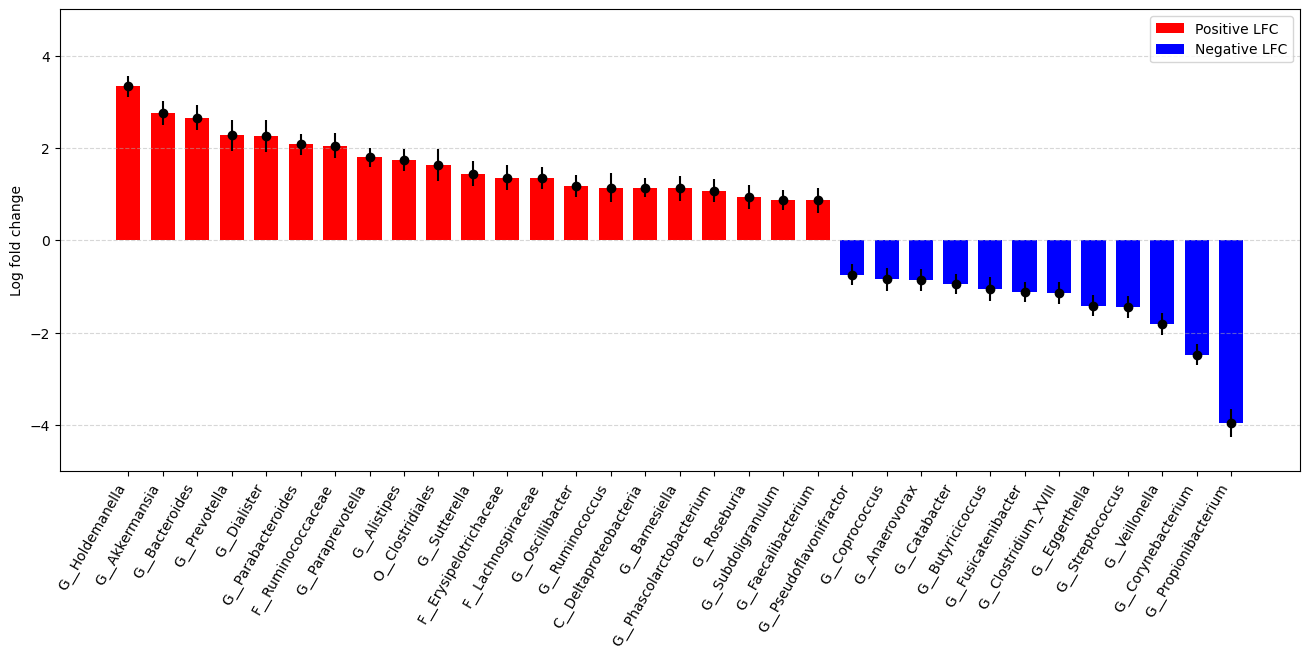

In [12]:
positive_color = 'red'
negative_color = 'blue'
# Plot
plt.figure(figsize=(16, 6))
plt.bar(x=res_prim_filt['taxon'], height=res_prim_filt['lfc_Materialstool'], width=0.7, color=[positive_color if direct == 'Positive LFC' else negative_color for direct in res_prim_filt['direct']])
plt.errorbar(x=res_prim_filt['taxon'], y=res_prim_filt['lfc_Materialstool'], yerr=res_prim_filt['se_Materialstool'], fmt='o', color='black')
plt.xlabel(None)
plt.ylabel('Log fold change')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Set y-axis limits
plt.ylim(-5, 5)

# Customize legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=positive_color, label='Positive LFC'),
                   Patch(facecolor=negative_color, label='Negative LFC')]
plt.legend(handles=legend_elements)
plt.savefig('./results/diff_abund_primary_BSPSPC.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
res_prim_PSC

,taxon,lfc_(Intercept),lfc_Materialstool,se_(Intercept),se_Materialstool,W_(Intercept),W_Materialstool,p_(Intercept),p_Materialstool,q_(Intercept),q_Materialstool,diff_(Intercept),diff_Materialstool,passed_ss_(Intercept),passed_ss_Materialstool
1,C__Alphaproteobacteria,0.749286,-0.466266,0.080182,0.122561,9.344798,-3.804351,8.761606e-18,1.826454e-04,2.102785e-16,3.835553e-03,True,True,True,True
2,F__Coriobacteriaceae,0.079934,-0.028950,0.022673,0.087995,3.525587,-0.329001,5.001696e-04,7.424226e-01,3.501187e-03,1.000000e+00,True,False,False,False
3,F__Enterobacteriaceae,-0.659855,0.875974,0.041884,0.105725,-15.754257,8.285390,3.883405e-39,7.641237e-15,1.631030e-37,2.750845e-13,True,True,False,True
4,F__Erysipelotrichaceae,-0.197106,0.292108,0.036310,0.102134,-5.428362,2.860042,9.122035e-08,4.424006e-03,1.094644e-06,7.078409e-02,True,False,True,False
5,F__Lachnospiraceae,-1.146277,1.554092,0.079867,0.123116,-14.352332,12.622940,3.263666e-40,1.854453e-32,1.403376e-38,8.901376e-31,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,O__Bacteroidales,-1.298481,1.609754,0.039120,0.099323,-33.192457,16.207254,5.417573e-71,8.828245e-35,2.979665e-69,4.502405e-33,True,True,False,False
68,O__Clostridiales,-0.366019,0.551367,0.062197,0.130723,-5.884793,4.217823,7.815313e-09,2.986346e-05,1.172297e-07,7.167229e-04,True,True,True,True
69,P__Firmicutes,0.093975,0.049357,0.054733,0.115478,1.716968,0.427413,8.666557e-02,6.692807e-01,4.333278e-01,1.000000e+00,False,False,False,False
70,P__Parcubacteria,1.071242,-2.592526,0.075929,0.111306,14.108451,-23.291782,2.964456e-26,6.488376e-44,9.486259e-25,3.828142e-42,True,True,True,True


In [14]:
res_prim_filt = res_prim_PSC[(res_prim_PSC['passed_ss_Materialstool'] == True) & (res_prim_PSC['q_Materialstool'] < 0.1)]

In [15]:
res_prim_filt = res_prim_filt.sort_values(by='lfc_Materialstool', ascending=False)
# Create 'direct' column based on lfc_age
res_prim_filt['direct'] = ['Positive LFC' if lfc > 0 else 'Negative LFC' for lfc in res_prim_filt['lfc_Materialstool']]
# Convert 'taxon' and 'direct' to categorical variables
res_prim_filt['taxon'] = pd.Categorical(res_prim_filt['taxon'], categories=res_prim_filt['taxon'].unique())
res_prim_filt['direct'] = pd.Categorical(res_prim_filt['direct'], categories=['Positive LFC', 'Negative LFC'])

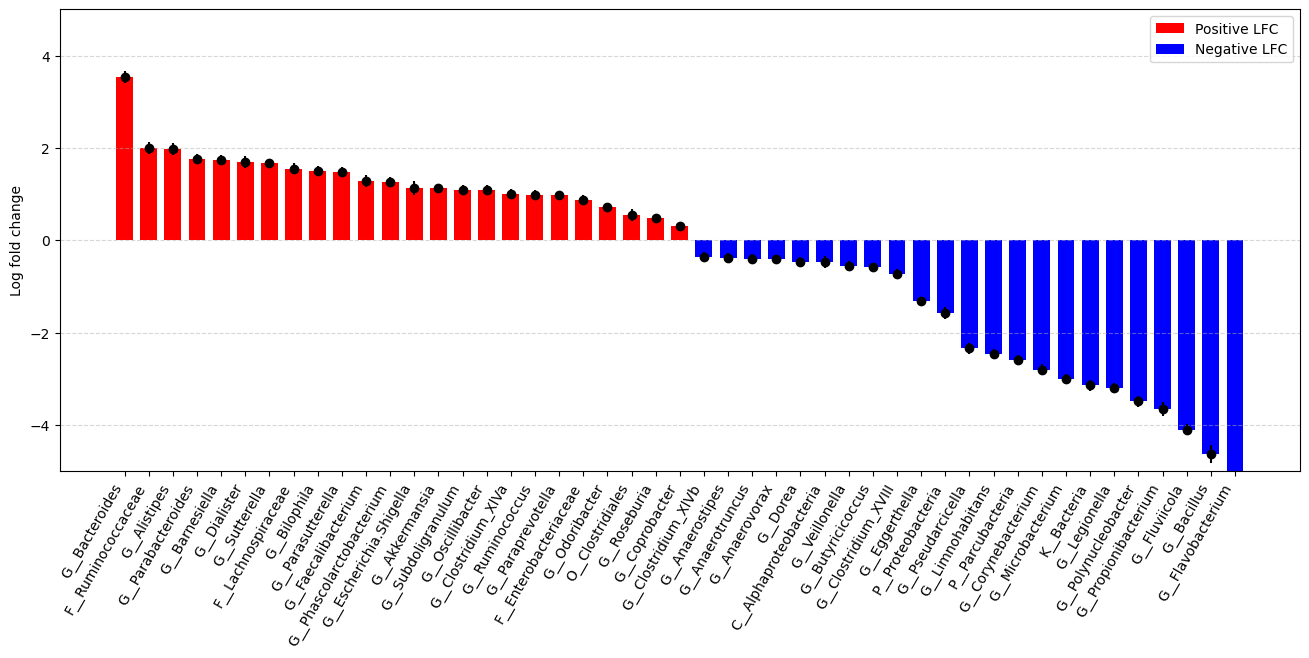

In [17]:
positive_color = 'red'
negative_color = 'blue'
# Plot
plt.figure(figsize=(16, 6))
plt.bar(x=res_prim_filt['taxon'], height=res_prim_filt['lfc_Materialstool'], width=0.7, color=[positive_color if direct == 'Positive LFC' else negative_color for direct in res_prim_filt['direct']])
plt.errorbar(x=res_prim_filt['taxon'], y=res_prim_filt['lfc_Materialstool'], yerr=res_prim_filt['se_Materialstool'], fmt='o', color='black')
plt.xlabel(None)
plt.ylabel('Log fold change')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Set y-axis limits
plt.ylim(-5, 5)

# Customize legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=positive_color, label='Positive LFC'),
                   Patch(facecolor=negative_color, label='Negative LFC')]
plt.legend(handles=legend_elements)
plt.savefig('./results/diff_abund_primary_PSC.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
common_taxa = set(res_prim_BSPSPC['taxon']).intersection(res_prim_PSC['taxon'])

In [19]:
res_prim_BSPSPC['taxon']

1       C__Alphaproteobacteria
2       C__Deltaproteobacteria
3        F__Enterobacteriaceae
4       F__Erysipelotrichaceae
5           F__Lachnospiraceae
6        F__Porphyromonadaceae
7           F__Ruminococcaceae
8               G__Akkermansia
9                 G__Alistipes
10             G__Anaerostipes
11            G__Anaerotruncus
12              G__Anaerovorax
13              G__Bacteroides
14              G__Barnesiella
15                G__Bilophila
16                  G__Blautia
17           G__Butyricicoccus
18            G__Butyricimonas
19               G__Catabacter
20           G__Clostridium_IV
21        G__Clostridium_XVIII
22         G__Clostridium_XlVa
23         G__Clostridium_XlVb
24              G__Collinsella
25              G__Coprobacter
26              G__Coprococcus
27          G__Corynebacterium
28                G__Dialister
29                    G__Dorea
30              G__Eggerthella
31     G__Escherichia.Shigella
32         G__Faecalibacterium
33      

In [20]:
res_prim_PSC['taxon']

1     C__Alphaproteobacteria
2       F__Coriobacteriaceae
3      F__Enterobacteriaceae
4     F__Erysipelotrichaceae
5         F__Lachnospiraceae
               ...          
67          O__Bacteroidales
68          O__Clostridiales
69             P__Firmicutes
70          P__Parcubacteria
71         P__Proteobacteria
Name: taxon, Length: 71, dtype: object

In [21]:
res_prim_PSC_unique = res_prim_PSC[~res_prim_PSC['taxon'].isin(common_taxa)]

In [22]:
res_prim_PSC_unique

,taxon,lfc_(Intercept),lfc_Materialstool,se_(Intercept),se_Materialstool,W_(Intercept),W_Materialstool,p_(Intercept),p_Materialstool,q_(Intercept),q_Materialstool,diff_(Intercept),diff_Materialstool,passed_ss_(Intercept),passed_ss_Materialstool
2,F__Coriobacteriaceae,0.079934,-0.028950,0.022673,0.087995,3.525587,-0.329001,5.001696e-04,7.424226e-01,3.501187e-03,1.000000e+00,True,False,False,False
8,G__Acidaminococcus,-2.604613,2.913143,0.021455,0.087972,-121.398226,33.114627,5.850284e-98,1.002724e-50,3.510170e-96,6.617975e-49,True,True,False,False
14,G__Bacillus,1.343719,-4.622232,0.166160,0.193005,8.086910,-23.948726,1.654811e-12,9.599379e-43,2.813179e-11,5.567640e-41,True,True,True,True
17,G__Bifidobacterium,-0.271837,0.311700,0.023059,0.086819,-11.788992,3.590225,4.442485e-24,4.271121e-04,1.332745e-22,8.542243e-03,True,True,False,False
36,G__Flavobacterium,1.442258,-5.160314,0.083782,0.118459,17.214321,-43.562075,3.298214e-34,2.160740e-75,1.286304e-32,1.490910e-73,True,True,True,True
38,G__Fluviicola,1.165715,-4.102614,0.085856,0.119747,13.577497,-34.260585,1.995898e-24,4.606740e-57,6.187285e-23,3.132583e-55,True,True,True,True
41,G__Legionella,1.140134,-3.187326,0.075870,0.111341,15.027387,-28.626738,6.784470e-24,4.459768e-41,1.967496e-22,2.363677e-39,True,True,True,True
42,G__Limnohabitans,1.070801,-2.453621,0.073996,0.109707,14.471017,-22.365259,3.964195e-27,1.564345e-42,1.347826e-25,8.916767e-41,True,True,True,True
45,G__Olsenella,0.248949,-0.129026,0.014193,0.082123,17.539707,-1.571135,2.693741e-36,1.185452e-01,1.077496e-34,1.000000e+00,True,False,False,False
47,G__Oxalobacter,-0.442838,0.581044,0.020565,0.082211,-21.533891,7.067727,1.337109e-47,5.649646e-11,6.150699e-46,1.751390e-09,True,True,False,False


In [23]:
res_prim_PSC_common = res_prim_PSC[res_prim_PSC['taxon'].isin(common_taxa)]

In [24]:
res_prim_PSC_common

,taxon,lfc_(Intercept),lfc_Materialstool,se_(Intercept),se_Materialstool,W_(Intercept),W_Materialstool,p_(Intercept),p_Materialstool,q_(Intercept),q_Materialstool,diff_(Intercept),diff_Materialstool,passed_ss_(Intercept),passed_ss_Materialstool
1,C__Alphaproteobacteria,0.749286,-0.466266,0.080182,0.122561,9.344798,-3.804351,8.761606e-18,1.826454e-04,2.102785e-16,3.835553e-03,True,True,True,True
3,F__Enterobacteriaceae,-0.659855,0.875974,0.041884,0.105725,-15.754257,8.285390,3.883405e-39,7.641237e-15,1.631030e-37,2.750845e-13,True,True,False,True
4,F__Erysipelotrichaceae,-0.197106,0.292108,0.036310,0.102134,-5.428362,2.860042,9.122035e-08,4.424006e-03,1.094644e-06,7.078409e-02,True,False,True,False
5,F__Lachnospiraceae,-1.146277,1.554092,0.079867,0.123116,-14.352332,12.622940,3.263666e-40,1.854453e-32,1.403376e-38,8.901376e-31,True,True,True,True
6,F__Porphyromonadaceae,-0.053173,0.475713,0.032855,0.096273,-1.618408,4.941314,1.084915e-01,2.853253e-06,4.339662e-01,7.989107e-05,False,True,False,False
7,F__Ruminococcaceae,-1.656900,2.004716,0.079653,0.130579,-20.801393,15.352545,2.846032e-71,1.660157e-44,1.593778e-69,9.960941e-43,True,True,True,True
9,G__Akkermansia,-1.047560,1.127729,0.031614,0.103058,-33.135702,10.942647,1.717094e-92,5.955449e-23,9.959146e-91,2.620398e-21,True,True,True,True
10,G__Alistipes,-1.785403,1.972635,0.066695,0.125467,-26.769843,15.722287,3.376742e-97,3.255340e-45,1.992278e-95,1.985758e-43,True,True,True,True
11,G__Anaerostipes,0.488069,-0.383382,0.057552,0.110033,8.480514,-3.484235,3.930438e-16,5.458186e-04,8.253919e-15,9.824734e-03,True,True,True,True
12,G__Anaerotruncus,0.465191,-0.404871,0.035424,0.105937,13.131997,-3.821796,1.317242e-33,1.509934e-04,5.005521e-32,3.321855e-03,True,True,True,True


In [25]:
res_prim_stool

,taxon,lfc_(Intercept),lfc_GroupPSC,se_(Intercept),se_GroupPSC,W_(Intercept),W_GroupPSC,p_(Intercept),p_GroupPSC,q_(Intercept),q_GroupPSC,diff_(Intercept),diff_GroupPSC,passed_ss_(Intercept),passed_ss_GroupPSC
1,C__Alphaproteobacteria,-0.280237,0.228478,0.180359,0.178853,-1.553773,1.277461,1.224186e-01,2.034810e-01,1.000000e+00,1.000000e+00,False,False,True,True
2,F__Clostridiales_Incertae_Sedis_XII,1.007926,-1.174295,0.131312,0.122364,7.675824,-9.596738,8.913345e-12,4.928430e-16,5.437140e-10,3.055627e-14,True,True,False,False
3,F__Coriobacteriaceae,0.366674,-0.480108,0.189552,0.187581,1.934427,-2.559470,5.403327e-02,1.099049e-02,1.000000e+00,4.286290e-01,False,False,False,False
4,F__Enterobacteriaceae,-0.354231,0.326151,0.195322,0.198003,-1.813577,1.647206,7.098150e-02,1.008136e-01,1.000000e+00,1.000000e+00,False,False,True,True
5,F__Erysipelotrichaceae,0.071204,-0.145376,0.221779,0.224000,0.321056,-0.649002,7.483036e-01,5.166387e-01,1.000000e+00,1.000000e+00,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,K__Bacteria,0.728297,-0.852217,0.282818,0.284876,2.575145,-2.991543,1.066047e-02,3.084978e-03,4.477397e-01,1.326541e-01,False,False,False,False
59,O__Bacteroidales,0.172533,-0.177738,0.285316,0.286868,0.604706,-0.619584,5.462000e-01,5.363814e-01,1.000000e+00,1.000000e+00,False,False,False,False
60,O__Clostridiales,1.107677,-1.269890,0.299315,0.307385,3.700713,-4.131265,2.412024e-04,4.291052e-05,1.326613e-02,2.402989e-03,True,True,True,True
61,P__Firmicutes,0.794569,-0.930675,0.275196,0.279294,2.887278,-3.332243,4.065425e-03,9.296097e-04,1.870095e-01,4.369166e-02,False,True,False,True


In [26]:
res_prim_filt = res_prim_stool[(res_prim_stool['passed_ss_GroupPSC'] == True) & (res_prim_stool['q_GroupPSC'] < 0.1)]

In [27]:
res_prim_filt = res_prim_filt.sort_values(by='lfc_GroupPSC', ascending=False)
# Create 'direct' column based on lfc_age
res_prim_filt['direct'] = ['Positive LFC' if lfc > 0 else 'Negative LFC' for lfc in res_prim_filt['lfc_GroupPSC']]
# Convert 'taxon' and 'direct' to categorical variables
res_prim_filt['taxon'] = pd.Categorical(res_prim_filt['taxon'], categories=res_prim_filt['taxon'].unique())
res_prim_filt['direct'] = pd.Categorical(res_prim_filt['direct'], categories=['Positive LFC', 'Negative LFC'])

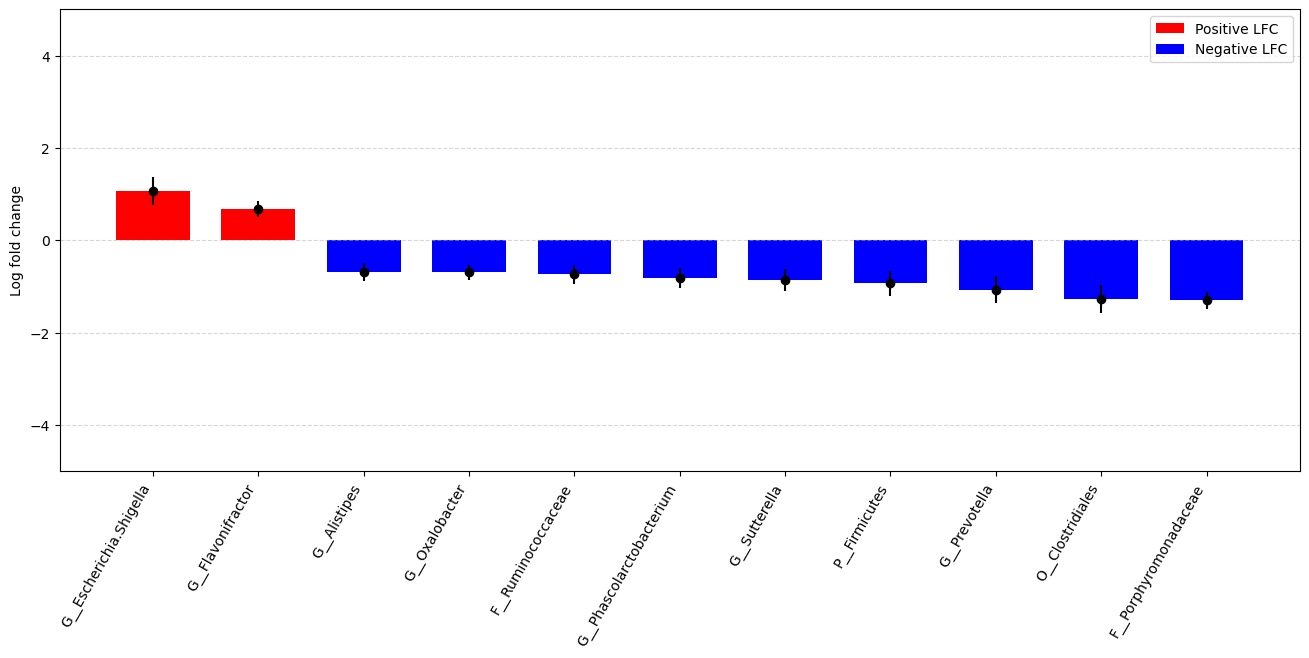

In [28]:
positive_color = 'red'
negative_color = 'blue'
# Plot
plt.figure(figsize=(16, 6))
plt.bar(x=res_prim_filt['taxon'], height=res_prim_filt['lfc_GroupPSC'], width=0.7, color=[positive_color if direct == 'Positive LFC' else negative_color for direct in res_prim_filt['direct']])
plt.errorbar(x=res_prim_filt['taxon'], y=res_prim_filt['lfc_GroupPSC'], yerr=res_prim_filt['se_GroupPSC'], fmt='o', color='black')
plt.xlabel(None)
plt.ylabel('Log fold change')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Set y-axis limits
plt.ylim(-5, 5)

# Customize legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=positive_color, label='Positive LFC'),
                   Patch(facecolor=negative_color, label='Negative LFC')]
plt.legend(handles=legend_elements)
plt.savefig('./results/diff_abund_primary_stool.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
res_prim_filt = res_prim_seren[(res_prim_seren['passed_ss_GroupPSC'] == True) & (res_prim_seren['q_GroupPSC'] < 0.1)]

In [30]:
res_prim_filt = res_prim_filt.sort_values(by='lfc_GroupPSC', ascending=False)
# Create 'direct' column based on lfc_age
res_prim_filt['direct'] = ['Positive LFC' if lfc > 0 else 'Negative LFC' for lfc in res_prim_filt['lfc_GroupPSC']]
# Convert 'taxon' and 'direct' to categorical variables
res_prim_filt['taxon'] = pd.Categorical(res_prim_filt['taxon'], categories=res_prim_filt['taxon'].unique())
res_prim_filt['direct'] = pd.Categorical(res_prim_filt['direct'], categories=['Positive LFC', 'Negative LFC'])

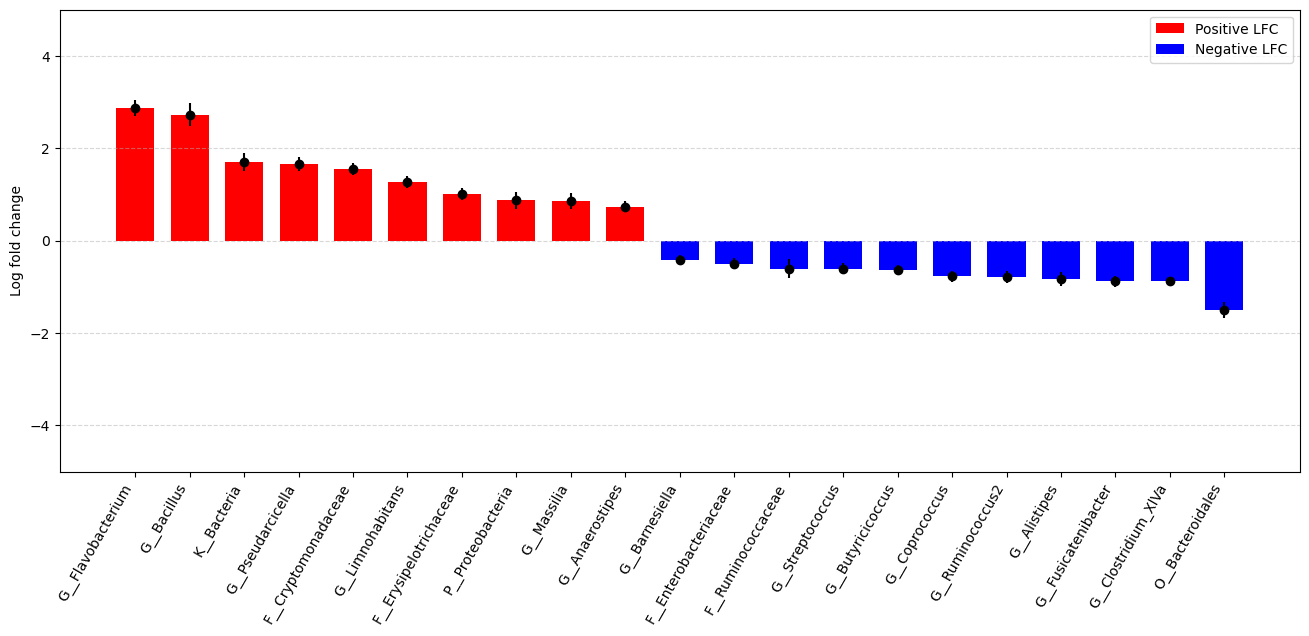

In [31]:
positive_color = 'red'
negative_color = 'blue'
# Plot
plt.figure(figsize=(16, 6))
plt.bar(x=res_prim_filt['taxon'], height=res_prim_filt['lfc_GroupPSC'], width=0.7, color=[positive_color if direct == 'Positive LFC' else negative_color for direct in res_prim_filt['direct']])
plt.errorbar(x=res_prim_filt['taxon'], y=res_prim_filt['lfc_GroupPSC'], yerr=res_prim_filt['se_GroupPSC'], fmt='o', color='black')
plt.xlabel(None)
plt.ylabel('Log fold change')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Set y-axis limits
plt.ylim(-5, 5)

# Customize legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=positive_color, label='Positive LFC'),
                   Patch(facecolor=negative_color, label='Negative LFC')]
plt.legend(handles=legend_elements)
plt.savefig('./results/diff_abund_primary_seren.png', dpi=300, bbox_inches='tight')
plt.show()